In [119]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [120]:
def toBinary(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] == 255:
                image[i,j] = 1
            else :
                image[i,j] = 0
    return image

(296, 534)


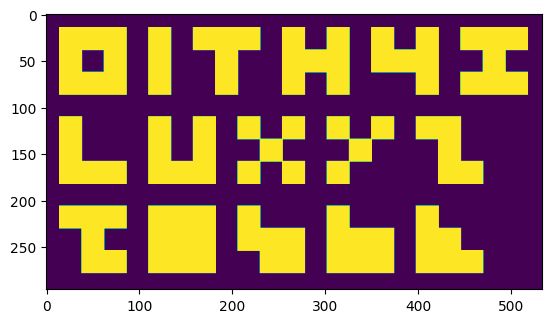

In [121]:
#Chargement Image

image = cv.imread("image1.png", cv.IMREAD_GRAYSCALE)
_, image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

print(image.shape)
image = toBinary(image)

plt.imshow(image)

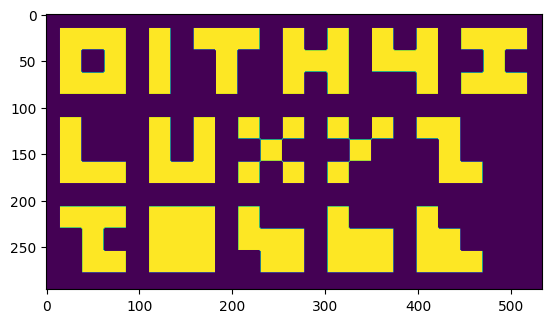

In [122]:
# Erosion

S = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]], np.uint8)

image_eroded = cv.erode(image, S)

plt.imshow(image_eroded)

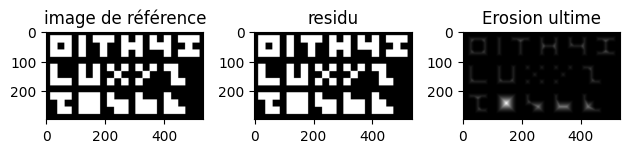

In [124]:
# Erosion Ultime

steps_erode = [image]
for i in range(50):
    steps_erode.append(cv.erode(steps_erode[i], S))

steps_dilate = []
for step in steps_erode:
    steps_dilate.append(cv.dilate(step, S))

residu = []
for eroded in steps_erode:
    for dilatated in steps_dilate:
        residu.append(cv.bitwise_and(eroded, dilatated))

result = np.zeros(image.shape)
for res in residu:
    result = result + res

plt.subplot(1,3,1)
plt.imshow(image, cmap= 'gray')
plt.title("image de référence")
plt.subplot(1,3,2)
plt.imshow(residu[0], cmap= 'gray')
plt.title("residu")
plt.subplot(1,3,3)
plt.imshow(result, cmap= 'gray')
plt.title("Erosion ultime")
plt.tight_layout()
plt.show()